In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset

In [2]:
car_df=pd.read_csv("D:\Datasets\datasets\Projects\Car insurance (Regresssion)\car_insurance.csv")

### EDA

In [3]:
car_df.head()

,id,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
0,569520,3,0,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,0,1,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,0,0,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,0,1,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,1,1,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [4]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  int64  
 2   gender               10000 non-null  int64  
 3   driving_experience   10000 non-null  object 
 4   education            10000 non-null  object 
 5   income               10000 non-null  object 
 6   credit_score         9018 non-null   float64
 7   vehicle_ownership    10000 non-null  float64
 8   vehicle_year         10000 non-null  object 
 9   married              10000 non-null  float64
 10  children             10000 non-null  float64
 11  postal_code          10000 non-null  int64  
 12  annual_mileage       9043 non-null   float64
 13  vehicle_type         10000 non-null  object 
 14  speeding_violations  10000 non-null  int64  
 15  duis                 10000 non-null  

In [9]:
car_df.isna().sum()

id                       0
age                      0
gender                   0
driving_experience       0
education                0
income                   0
credit_score           982
vehicle_ownership        0
vehicle_year             0
married                  0
children                 0
postal_code              0
annual_mileage         957
vehicle_type             0
speeding_violations      0
duis                     0
past_accidents           0
outcome                  0
dtype: int64

### Check if the percentage of missing data in (credit_score & annual_mileage) is less than or equal 5% of the whole data so we can drop them 

In [10]:
missing_to_drop=len(car_df)*0.05

In [11]:
missing_data=car_df.columns[car_df.isna().sum()<=missing_to_drop]

In [12]:
missing_data

Index(['id', 'age', 'gender', 'driving_experience', 'education', 'income',
       'vehicle_ownership', 'vehicle_year', 'married', 'children',
       'postal_code', 'vehicle_type', 'speeding_violations', 'duis',
       'past_accidents', 'outcome'],
      dtype='object')

### Visualizng missing data (type of missing data)

In [13]:
car_df_credit=car_df.sort_values("annual_mileage",ascending=False)

In [14]:
import missingno as msno

<Axes: >

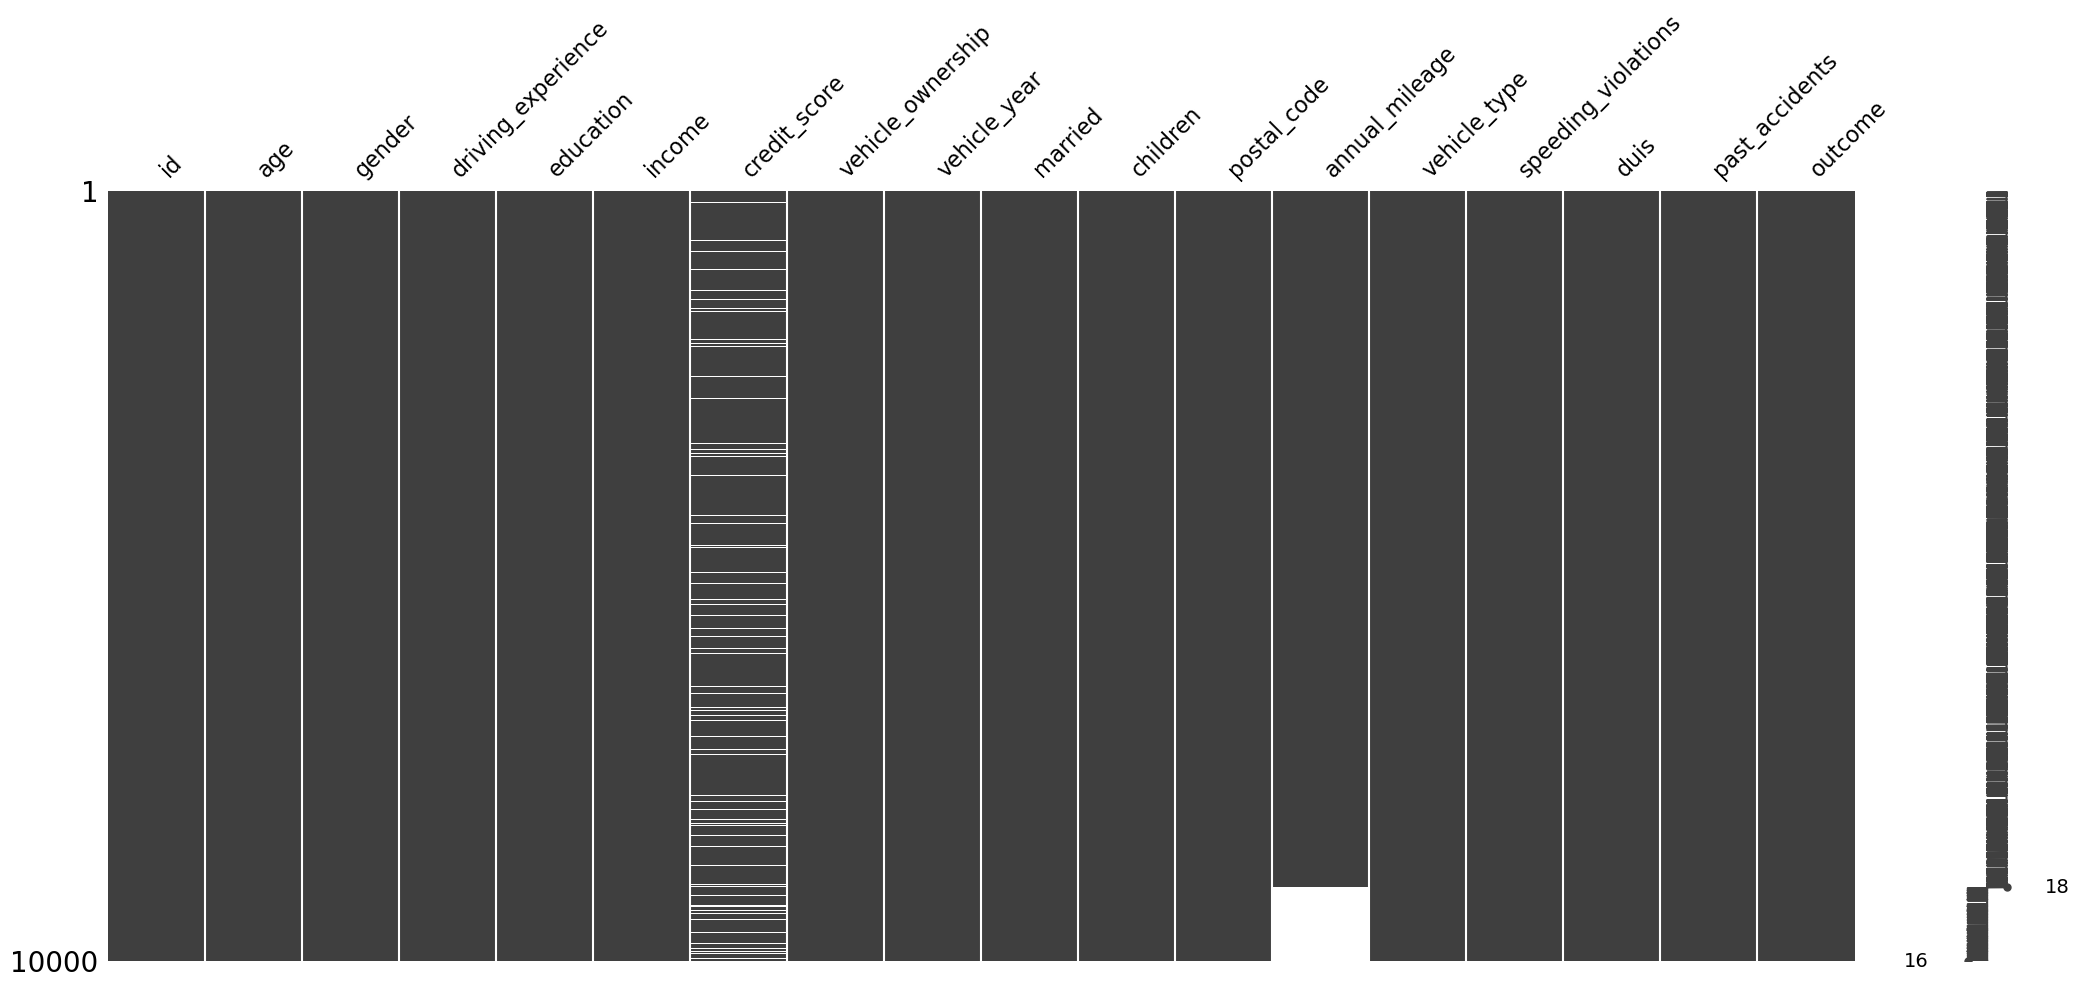

In [15]:
msno.matrix(car_df_credit)

### Shape of the data

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='credit_score', ylabel='Count'>

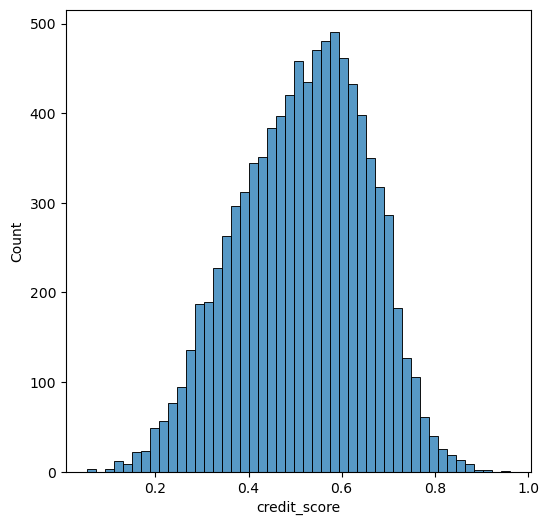

In [16]:
fig=plt.figure(figsize=(6,6))
sns.histplot(x="credit_score",data=car_df)

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='annual_mileage', ylabel='Count'>

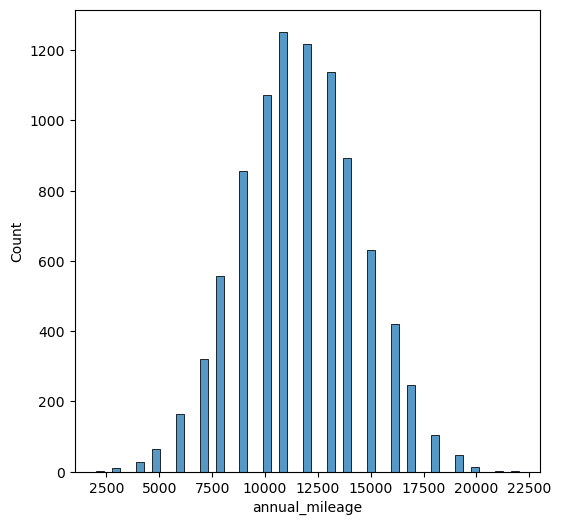

In [17]:
fig=plt.figure(figsize=(6,6))
sns.histplot(x="annual_mileage",data=car_df)

#### Know we gonna use mean imputer because missing data is MAT and the shape approaches normal distribution

In [18]:
from sklearn.impute import SimpleImputer

In [19]:
mean_imputer=SimpleImputer(strategy="mean")

In [20]:
car_df[["credit_score","annual_mileage"]]=mean_imputer.fit_transform(car_df[["credit_score","annual_mileage"]])

In [21]:
car_df.isna().sum()

id                     0
age                    0
gender                 0
driving_experience     0
education              0
income                 0
credit_score           0
vehicle_ownership      0
vehicle_year           0
married                0
children               0
postal_code            0
annual_mileage         0
vehicle_type           0
speeding_violations    0
duis                   0
past_accidents         0
outcome                0
dtype: int64

## Removing improper features 

In [22]:
car_df_features=car_df.drop(columns=["id","outcome"])

In [23]:
features=car_df_features.columns

## Creating model

In [24]:
features_list=[]

In [25]:
from statsmodels.formula.api import logit    

In [26]:
for i in features:
    model=logit(f"outcome ~ {i}",data=car_df).fit()
    features_list.append(model)

Optimization terminated successfully.
         Current function value: 0.511794
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.615951
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.467092
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.603742
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.531499
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.572557
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.552412
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.572668
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.586659
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.595431
  

## Assessing accuracy for each feature

In [27]:
features_accuracy=[]

In [28]:
for i in range(0,len(features_list)):
    con_matrix=features_list[i].pred_table()
    tp=con_matrix[0,0]
    tn=con_matrix[1,1]
    fp=con_matrix[1,0]
    fn=con_matrix[0,1]
    accuracy=(tp+tn)/(tp+tn+fp+fn)
    features_accuracy.append(accuracy)

In [29]:
max_accuracy_feature=features_accuracy.index(max(features_accuracy))
best_feature=features[max_accuracy_feature]
best_feature

'driving_experience'

## Dataframe of best feature based on accuracy

In [30]:
best_feature_df=pd.DataFrame({"best_feature":best_feature,
                             "accuracy":max(features_accuracy)},index=[0])

In [31]:
best_feature_df

,best_feature,accuracy
0,driving_experience,0.7771
